In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib notebook

In [4]:
df = pd.read_csv('FLO_L3_20170317.csv', skiprows=[1])
df.head()

,Julian Day,secDay,Lat,Lon,Heading,Speed (m/s),Water temp (C),Cond (mmho/cm),Salinity (PSU),CDOM (ppb),...,solar zenith (deg),depth (m),Nitrate (umol/L),Pressure (hPa).1,Phyco (ppb),pH,O2 umol/L.1,% sat O2.1,air temp,PAR
0,76,51882,43.728425,-70.208099,0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,...,55.208979,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,76,51902,43.728426,-70.208100,0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,...,55.162549,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,76,51922,43.728425,-70.208083,0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,...,55.122641,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,76,51942,43.728424,-70.208083,0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,...,55.079571,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,76,51962,43.728424,-70.208083,0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,...,55.033344,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [5]:
df = df[df['Water temp (C)'] != -9999]
df = df[df['Lon'] > -70.155]
df_orig = df.copy()

<IPython.core.display.Javascript object>


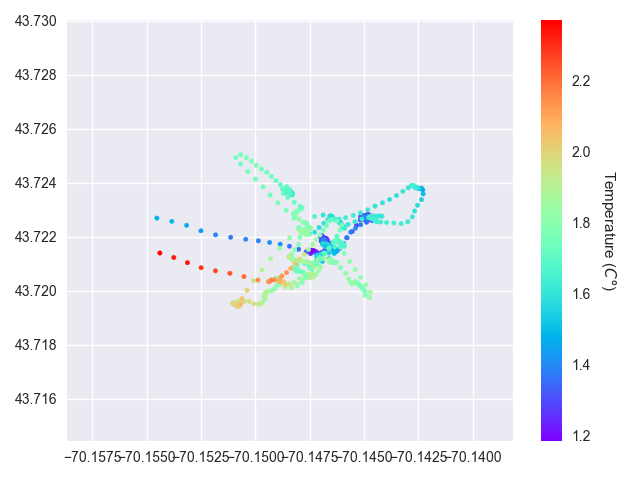

In [6]:
plt.figure()
# plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(y=df['Lat'], x=df['Lon'], 
            c=df['Water temp (C)'], cmap=plt.cm.rainbow, s=10)
cbar = plt.colorbar()
cbar.set_label(r'Temperature ($C\degree$)', rotation=270, labelpad=20)
plt.tight_layout()

In [187]:
df['Water temp (C)'].describe()

count    664.000000
mean       1.637445
std        0.252523
min        1.185068
25%        1.396226
50%        1.665761
75%        1.816862
max        2.371188
Name: Water temp (C), dtype: float64

<IPython.core.display.Javascript object>


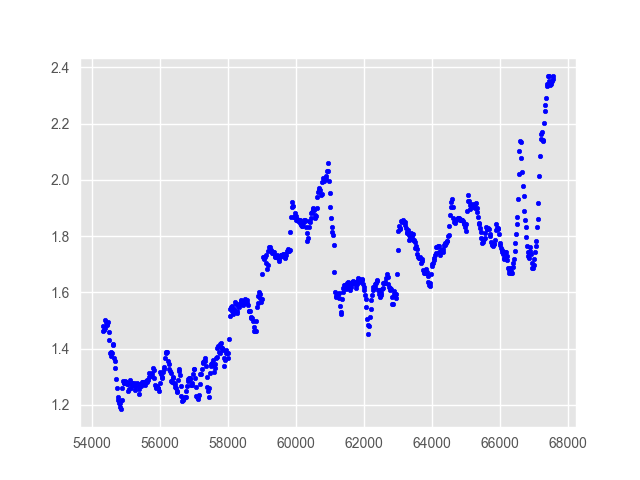

In [190]:
plt.figure()
plt.scatter(x=df['secDay'], y=df['Water temp (C)'], s=10, c='b')

<IPython.core.display.Javascript object>


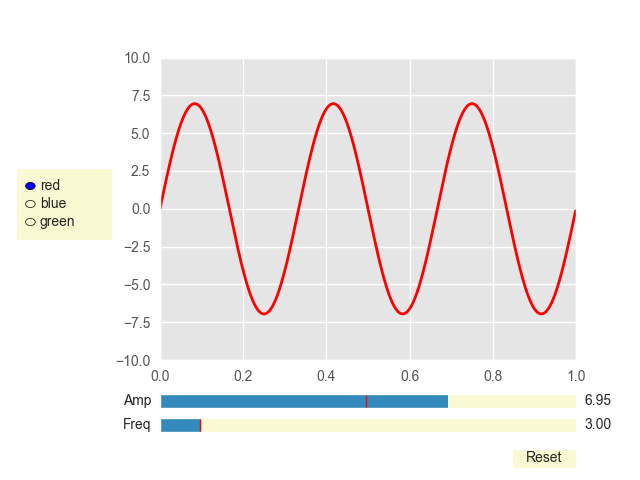

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
    print(1)
    
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

<IPython.core.display.Javascript object>


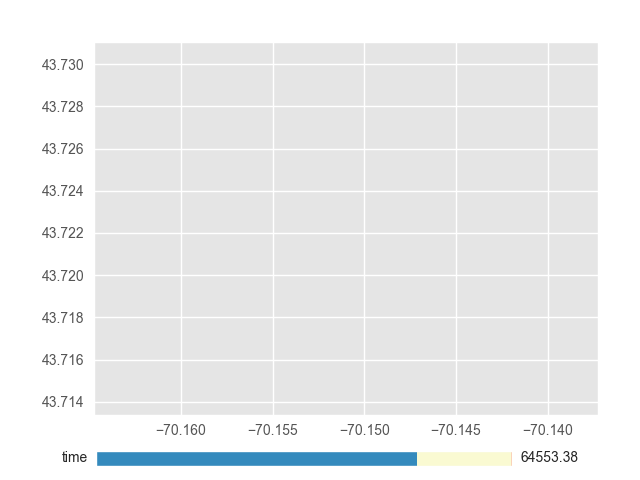

0

In [214]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
scat = ax.scatter(y=df['Lat'], x=df['Lon'], c=df['Water temp (C)'], cmap=plt.cm.rainbow, s=10)

# cbar = plt.colorbar()
# cbar.set_label(r'Temperature ($C\degree$)', rotation=270, labelpad=20)

plt.tight_layout(pad=3)

axcolor = 'lightgoldenrodyellow'
axtime = plt.axes([0.15, 0.03, 0.65, 0.03], facecolor=axcolor)

min_time = df['secDay'].min()
max_time = df['secDay'].max()

stime = Slider(axtime, 'time', min_time , max_time, valinit=max_time)

def update(val):
    time = stime.val
    
    data = df[['Lat', 'Lon']].values.T
    scat.set_offsets(data)
    fig.canvas.draw_idle()
    
stime.on_changed(update)

array([[ 44.723081, -69.15939 ],
       [ 44.723075, -69.158686],
       [ 44.723083, -69.157975],
       ..., 
       [ 44.722089, -69.158367],
       [ 44.722213, -69.159033],
       [ 44.722368, -69.159692]])

In [140]:
df['secDay'].max()

67582

<IPython.core.display.Javascript object>


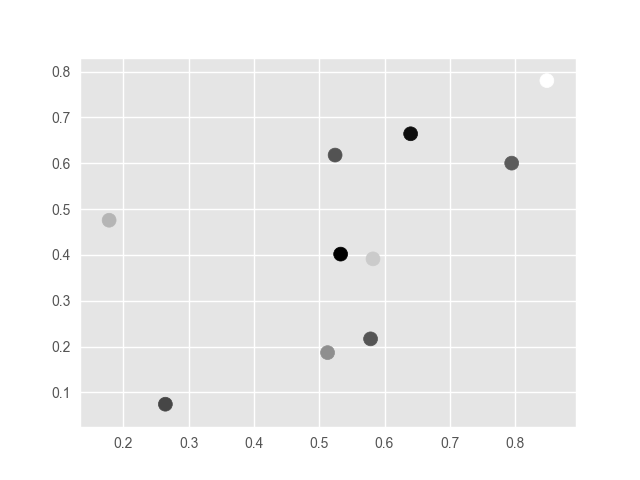

In [174]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

def main():
    numframes = 100
    numpoints = 10
    color_data = np.random.random((numframes, numpoints))
    x, y, c = np.random.random((3, numpoints))

    fig = plt.figure()
    scat = plt.scatter(x, y, c=c, s=100)

    ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                  fargs=(color_data, scat))
    plt.show()

def update_plot(i, data, scat):
    scat.set_array(data[i])
    return scat,

main()

<IPython.core.display.Javascript object>


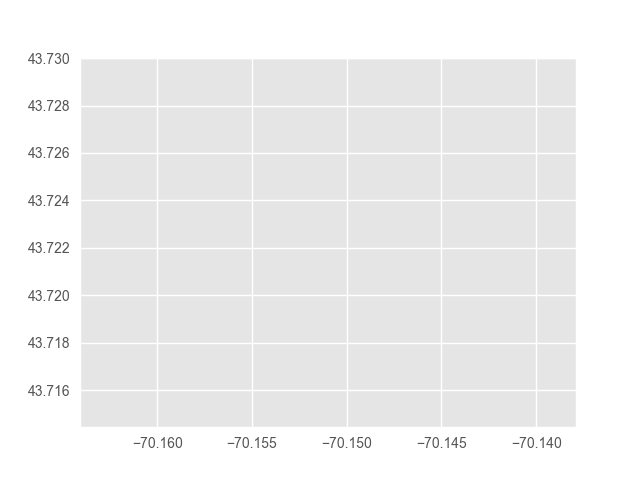

In [251]:
import matplotlib.pyplot as plt
import numpy as np


x = df['Lon'].values
y = df['Lat'].values
N = len(x)

plt.ion()

fig, ax = plt.subplots()
scat = ax.scatter(x, y, s=10, c='black')

for _ in range(20):
    # Change the colors...
    # scat.set_array(np.random.random(N))
    # Change the x,y positions. This expects a _single_ 2xN, 2D array
    noise = np.random.randn(N)
    x += noise
    y += noise
    
    scat.set_offsets(np.vstack((x, y)))
    fig.canvas.draw()

<IPython.core.display.Javascript object>


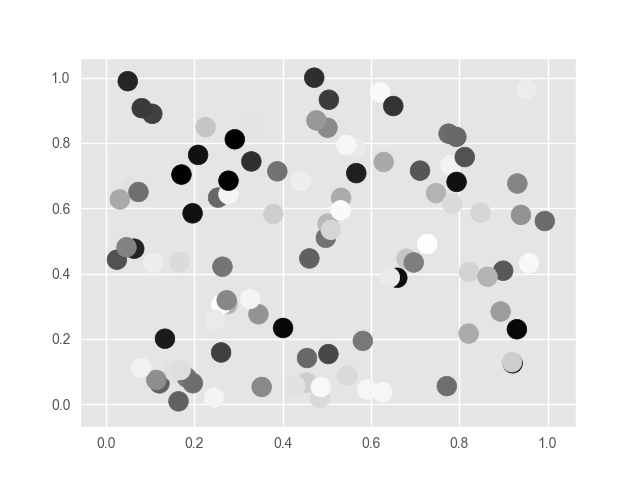

In [224]:
import matplotlib.pyplot as plt
import numpy as np

N = 100
x, y, z = np.random.random((3, N))

plt.ion()

fig, ax = plt.subplots()
scat = ax.scatter(x, y, c=z, s=200)

for _ in range(20):
    # Change the colors...
    scat.set_array(np.random.random(N))
    # Change the x,y positions. This expects a _single_ 2xN, 2D array
    scat.set_offsets(np.random.random((2,N)))
    fig.canvas.draw()


In [223]:
df['Lon'].values.shape

(664,)

In [228]:
x = df['Lon'].values
y = df['Lat'].values

In [230]:
np.vstack((x,y)).shape

(2, 664)

In [10]:
import matplotlib.animation as animation
from matplotlib import colors
from sklearn.preprocessing import MinMaxScaler


# sort by time order 
df = df.sort_values(['secDay'])

n = len(df)
speed = 2

vmin = df['sw fCO2 (uatm)'].min()
vmax = df['sw fCO2 (uatm)'].max()

In [16]:
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    
    if curr == int(n / speed):
        a.event_source.stop()
           
    curr *= speed
    
    plt.cla()
    plt.gca().set_title('In Water fCO2 (uatm)')
    plt.gca().set_ylabel('Longitude')
    plt.gca().set_xlabel('Latitude')
    
    plt.gca().set_xlim(-70.155, -70.140)
    plt.gca().set_ylim(43.716, 43.730)
    
    trailing_pts = 10
    
    if curr <= trailing_pts:
        curr_prev = 0
    else:
        curr_prev = curr - trailing_pts
        
    
    plt.scatter(x=df['Lon'][curr_prev:curr], y=df['Lat'][curr_prev:curr], 
                c=df['sw fCO2 (uatm)'][curr_prev:curr], cmap=plt.cm.jet, s=20,
                norm=colors.Normalize(vmin=vmin, vmax=vmax))

    plt.annotate('time = {}'.format(curr), [-70.143,43.728])
    plt.tight_layout()
#     plt.gcf().colorbar(ax=plt.gca())


<IPython.core.display.Javascript object>


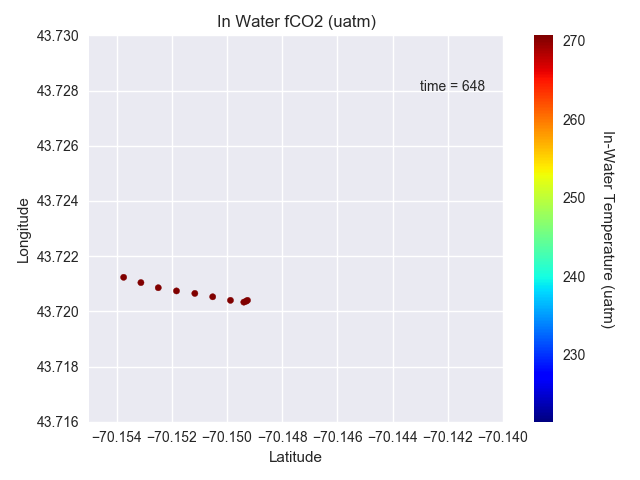

In [17]:
fig, ax = plt.subplots()

data = np.linspace(df['sw fCO2 (uatm)'].max(), df['sw fCO2 (uatm)'].max(), 100).reshape(10, 10)
im = ax.imshow(data, cmap='jet')
cbar = fig.colorbar(im)
cbar.set_label(r'In-Water Temperature (uatm)', rotation=270, labelpad=20)
plt.cla()

ax.set_xlim(-70.155, -70.140)
ax.set_ylim(43.716, 43.730)
plt.tight_layout()

a = animation.FuncAnimation(fig, update, interval=10)


In [41]:
df['Lon'][2:5]

124   -70.157975
125   -70.157280
126   -70.156589
Name: Lon, dtype: float64

In [37]:
df.columns

Index(['Julian Day', 'secDay', 'Lat', 'Lon', 'Heading', 'Speed (m/s)',
       'Water temp (C)', 'Cond (mmho/cm)', 'Salinity (PSU)', 'CDOM (ppb)',
       'Chl a (mg/m3)', 'Attenuation (c660)', 'O2 umol/L', '% sat O2',
       'Pressure (hPa)', 'sw xCO2 m (umol/mol)', 'sw xCO2 dry (umol/mol)',
       'sw pCO2 dry (uatm)', 'sw pCO2 (uatm)', 'sw fCO2 (uatm)',
       'air xCO2 (uatm)', 'air fCO2 (uatm)', 'air xCO2 (uatm).1',
       'air fCO2 (uatm).1', 'solar zenith (deg)', 'depth (m)',
       'Nitrate (umol/L)', 'Pressure (hPa).1', 'Phyco (ppb)', 'pH',
       'O2 umol/L.1', '% sat O2.1', 'air temp', 'PAR'],
      dtype='object')